Loading Data in the notebook

In [3]:
import pandas as pd 


In [14]:
train = pd.read_csv('train.csv')

In [15]:
df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [12]:
test = pd.read_csv('test.csv')

In [13]:
df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# meaning of each label 
# id = identifier for each tweet 
# text= text of tweet 
# location = location where tweet is sent from 
# keyword = keyword in a tweet 
#target= only in the train.csv denotes if is a real tweet 

Data Exploration

In [19]:
# example of a disaster tweet
# we use 1 because 1 indicates that this is a disaster tweet 
train_df[train_df["target"] == 1]["text"].values[2]


"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [20]:
# example of not a disaster tweet 
# we use 0 because 0 indicates that this is not a disaster tweet
train_df[train_df["target"] == 0]["text"].values[5]

'this is ridiculous....'

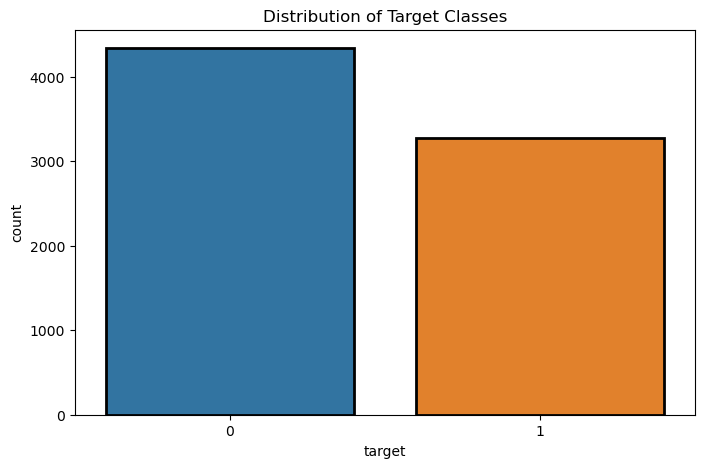

In [24]:
#Comparing the distrubutio of non disaster tweets and disaster tweets 


import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
plt.title("Distribution of Target Classes")
sns.countplot(x=train["target"], linewidth=2, edgecolor='black')
plt.show()


# we can see that there was about 4500 in class 0 and 3200 in class 1 

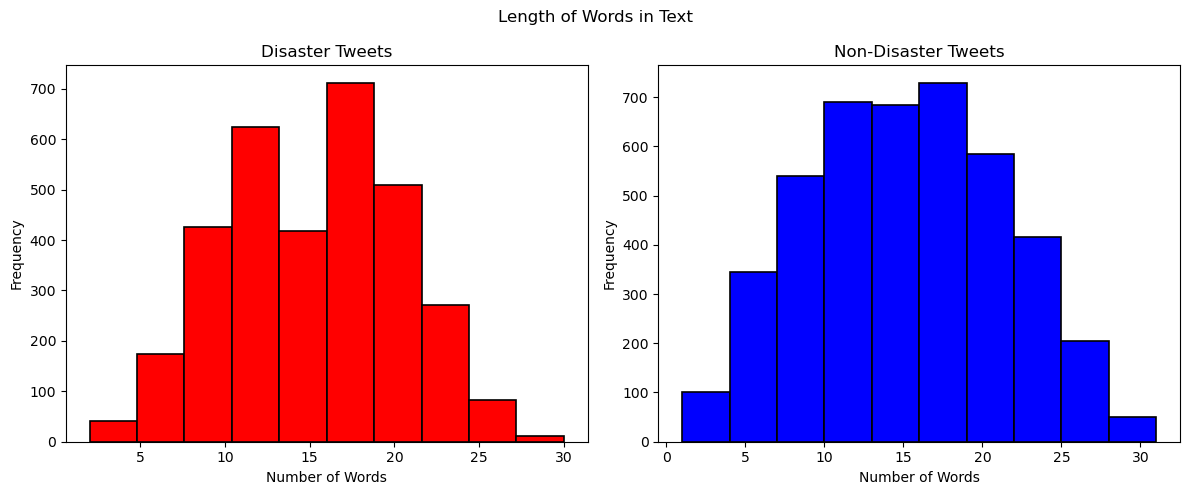

In [25]:
# Observing words in a text 

import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Disaster Tweets
char_len_dis = train[train['target'] == 1]['text'].str.split().map(lambda x: len(x))
ax1.hist(char_len_dis, color='red', edgecolor='black', linewidth=1.2)
ax1.set_title('Disaster Tweets')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Frequency')

# Plot for non disaster 
char_len_ndis = train[train['target'] == 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(char_len_ndis, color='blue', edgecolor='black', linewidth=1.2)
ax2.set_title('Non-Disaster Tweets')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Frequency')
plt.suptitle("Length of Words in Text")
plt.tight_layout()
plt.show()

# From this graph we can observe that both the disaster and non disater tweets range from 15-20 words. 
# However just from observation it looks like the non disaster tweet is more normally distributed, mostly between 10-20 words 

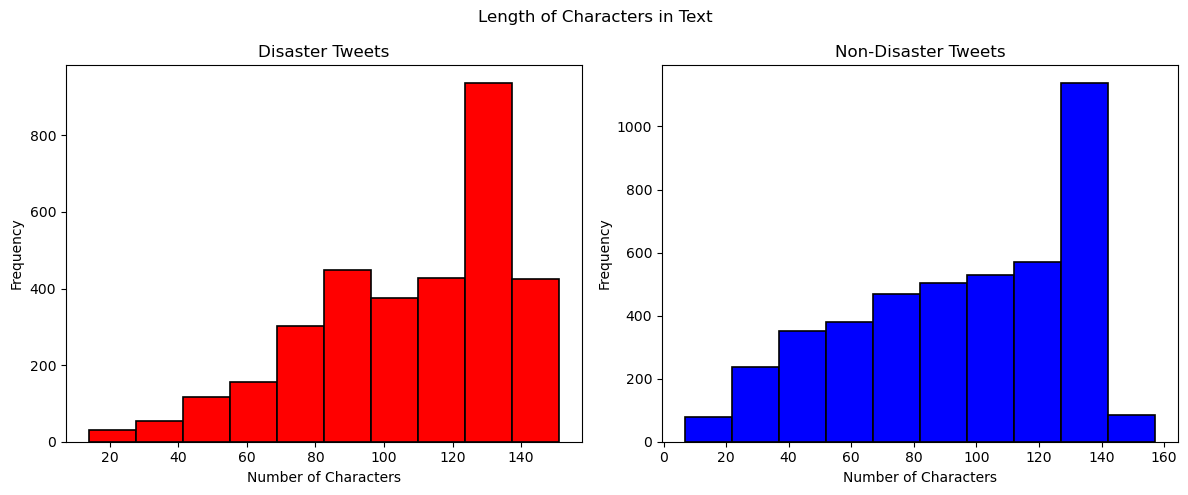

In [27]:
# Observes characters in a text



import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Disaster Tweets
char_len_dis = train[train['target'] == 1]['text'].apply(len)
ax1.hist(char_len_dis, color='red', edgecolor='black', linewidth=1.2)
ax1.set_title('Disaster Tweets')
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Frequency')

# Plot for Non-Disaster Tweets
char_len_ndis = train[train['target'] == 0]['text'].apply(len)
ax2.hist(char_len_ndis, color='blue', edgecolor='black', linewidth=1.2)
ax2.set_title('Non-Disaster Tweets')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Frequency')
plt.suptitle("Length of Characters in Text")
plt.tight_layout()
plt.show()


# The graphs for these are similar in distribution. We can see that the characters range from 120-140

/Users/aminajimale/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aminajimale/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


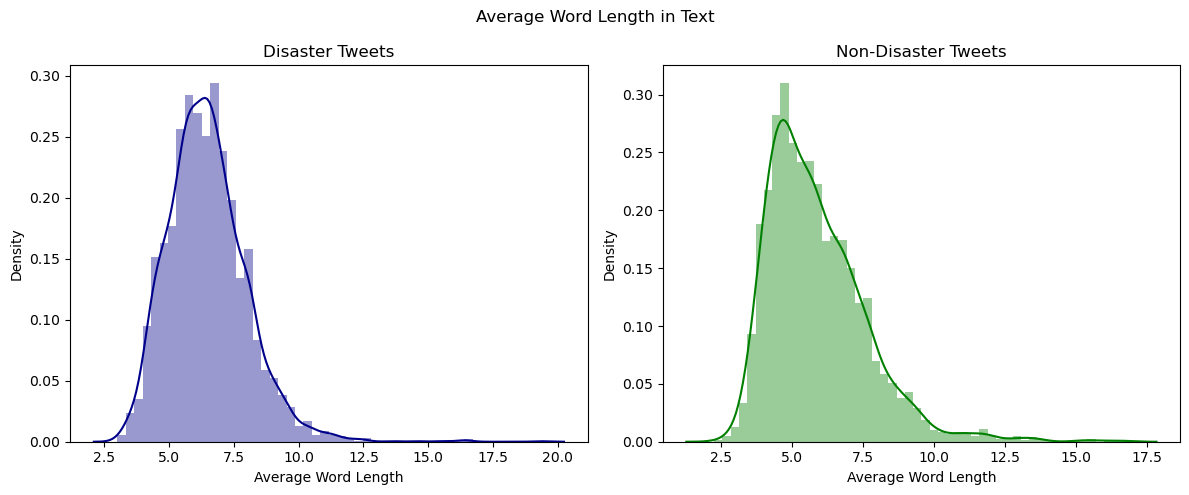

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Extract word lengths for Disaster Tweets
char_len_dis = train[train['target'] == 1]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_dis.map(lambda x: np.mean(x)), ax=ax1, color='darkblue')
ax1.set_title('Disaster Tweets')
ax1.set_xlabel('Average Word Length')
ax1.set_ylabel('Density')

# Extract word lengths for Non-Disaster Tweets
char_len_ndis = train[train['target'] == 0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_ndis.map(lambda x: np.mean(x)), ax=ax2, color='green')
ax2.set_title('Non-Disaster Tweets')
ax2.set_xlabel('Average Word Length')
ax2.set_ylabel('Density')
plt.suptitle("Average Word Length in Text")
plt.tight_layout()
plt.show()


From this information we can't really see any difference between the non disaster and disaster tweets 
Therefore we are going to do a more in depth analysis that views punctuation, missing words, and stop words 

In [33]:
def create_corpus(target):
    corpus = []
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus


# this code uses a sample corpus which looks at the wording of some of the tweets rather than all of them 

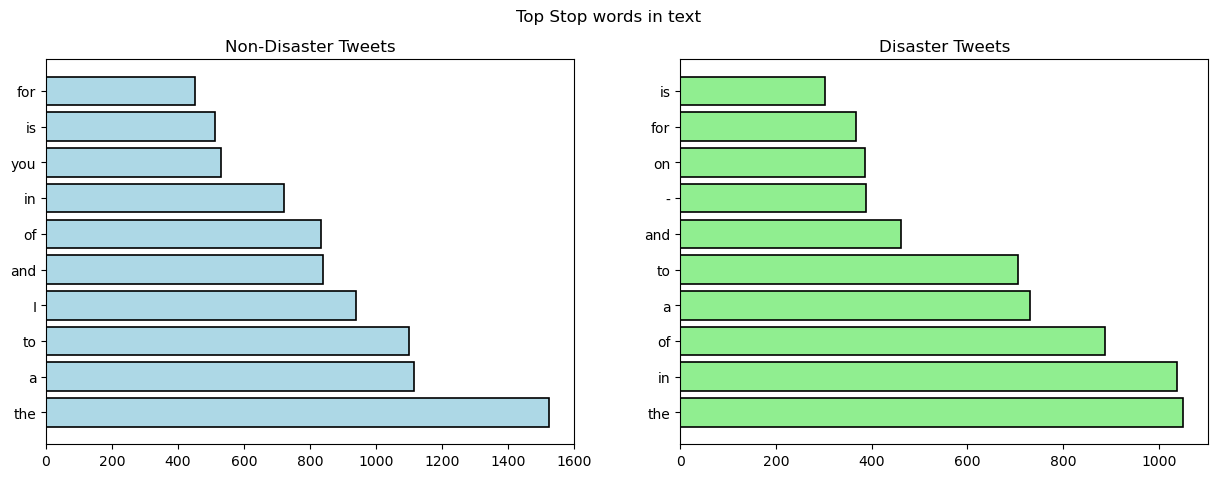

In [36]:
# analyzing stop words in the disaster and non disaster tweets 
# a stop word is a word that is commonly used in sentences but doesn't hold any valuable meaning therefore they are negligible for our goal. 

from collections import defaultdict

def analyze_stopwords(data,func,target):
    values_list = []
    for labels in range(0,len(target)):
        dic = defaultdict(int)
        corpus = func(target[labels])
        for word in corpus:
            dic[word]+=1
        top = sorted(dic.items(),key = lambda x: x[1],reverse=True)[:10]
        x_items,y_values = zip(*top)
        values_list.append(x_items)
        values_list.append(y_values)
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.barh(values_list[0],values_list[1],color="lightblue",edgecolor='black', linewidth=1.2)
    ax1.set_title("Non-Disaster Tweets")
    
    ax2.barh(values_list[2],values_list[3],color="lightgreen",edgecolor='black', linewidth=1.2)
    ax2.set_title("Disaster Tweets")
            
    plt.suptitle("Top Stop words in text")
    plt.show()

analyze_stopwords(train,create_corpus,[0,1])
 
# we can observe that the most common stop word is the for both non disaster and disaster tweets
# we can observe that the least common stop word for disaster tweets is "is" and for non disaster tweets "for"

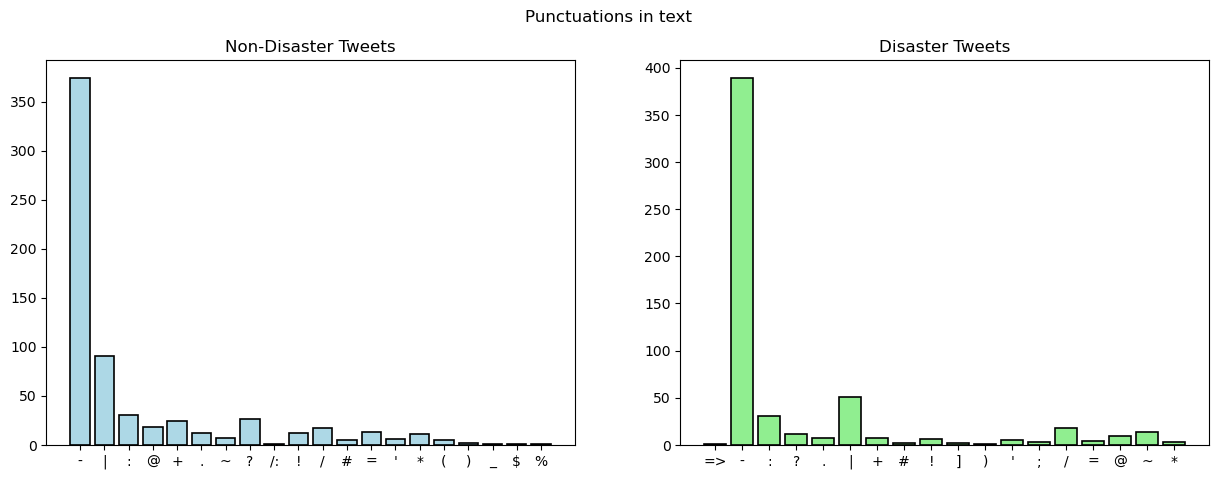

In [38]:
# now let's view puncutations

import string

def analyze_punctuation(data,func,target):
    values_list = []
    special = string.punctuation
    for labels in range(0,len(target)):
        dic = defaultdict(int)
        corpus = func(target[labels])
        for i in corpus:
            if i in special:
                dic[i]+=1
        x_items,y_values = zip(*dic.items())
        values_list.append(x_items)
        values_list.append(y_values)
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.bar(values_list[0],values_list[1],color="lightblue",edgecolor='black', linewidth=1.2)
    ax1.set_title("Non-Disaster Tweets")
    
    ax2.bar(values_list[2],values_list[3],color="lightgreen",edgecolor='black', linewidth=1.2)
    ax2.set_title("Disaster Tweets")
            
    plt.suptitle("Punctuations in text")
    plt.show()

analyze_punctuation(train,create_corpus,[0,1])


# most common punctuation used for both types of tweets is "-" 
# least common punctuation used for non disaster tweets is "% $ _ () "
#  least common punctuation used for disaster tweets is "*, ~, :, = >"

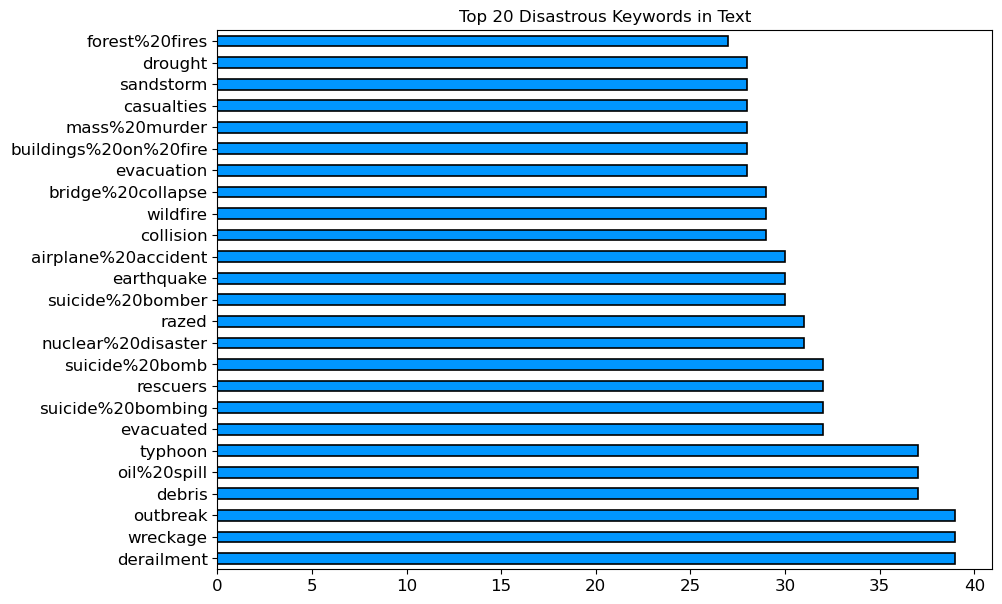

In [49]:
# top 25 disasters key words 


plt.figure(figsize=(10,7))
train[train['target']==1]['keyword'].value_counts()[:25].plot(kind='barh', fontsize=12,title='Top 20 Disastrous Keywords in Text', color='#0096FF',edgecolor='black', linewidth=1.2)
plt.show()

# derailment is the most common word 

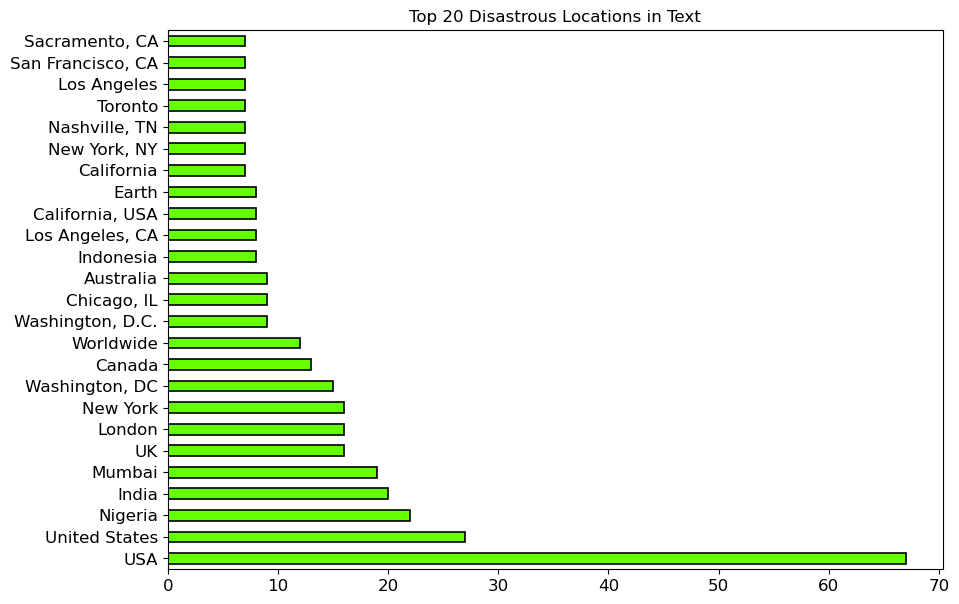

In [48]:
# top 25 disasters locations

plt.figure(figsize=(10,7))
train[train["target"]==1]["location"].value_counts()[:25].plot(kind='barh',fontsize=12, title='Top 20 Disastrous Locations in Text', color='#66ff00',edgecolor='black', linewidth=1.2)
plt.show()

# most tweets come from USA

Cleaning the Data: removing HTML , stop words, lowercasing words


In [59]:
# Seperating independent and dependent features
X = train.drop(columns=["target"],axis=1)
y = train["target"]

In [63]:

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK stopwords
import nltk
nltk.download('stopwords')

df = pd.read_csv('train.csv')  


ps = PorterStemmer()

def preprocess_data(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    
    # Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenization
    words = text.split()
    
    # Remove stopwords and apply stemming
    words = [ps.stem(word) for word in words if word not in stopwords.words('english')]
    
    # Combine tokens into a string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

# Apply the cleaning function to the 'text' column
df['Cleaned_text'] = df['text'].apply(preprocess_data)

# Save the cleaned data to a new CSV file
df.to_csv('train_cleaned_data.csv', index=False)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aminajimale/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [93]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK stopwords
import nltk
nltk.download('stopwords')

df = pd.read_csv('test.csv')  


ps = PorterStemmer()

def preprocess_data(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    
    # Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenization
    words = text.split()
    
    # Remove stopwords and apply stemming
    words = [ps.stem(word) for word in words if word not in stopwords.words('english')]
    
    # Combine tokens into a string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

# Apply the cleaning function to the 'text' column
df['Cleaned_text'] = df['text'].apply(preprocess_data)

# Save the cleaned data frame to a new CSV file
df.to_csv('test_cleaned_data.csv', index=False)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aminajimale/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
import pandas as pd
clean_test = pd.read_csv('test_cleaned_data.csv')


In [103]:
df.head()

,id,keyword,location,text,Cleaned_text
0,0,NaN,NaN,Just happened a terrible car crash,happen terribl car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard earthquak differ citi stay safe everyon
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond gees flee across street ...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalyps light spokan wildfir
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan


In [94]:
import pandas as pd
clean_train= pd.read_csv('train_cleaned_data.csv')

In [95]:
df.head()

,id,keyword,location,text,Cleaned_text
0,0,NaN,NaN,Just happened a terrible car crash,happen terribl car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard earthquak differ citi stay safe everyon
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond gees flee across street ...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalyps light spokan wildfir
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan


Last graphs we saw that the most common words in tweets where 
the, for, and if which are stop words. Now that we cleaned the data let's see what the most common words are 

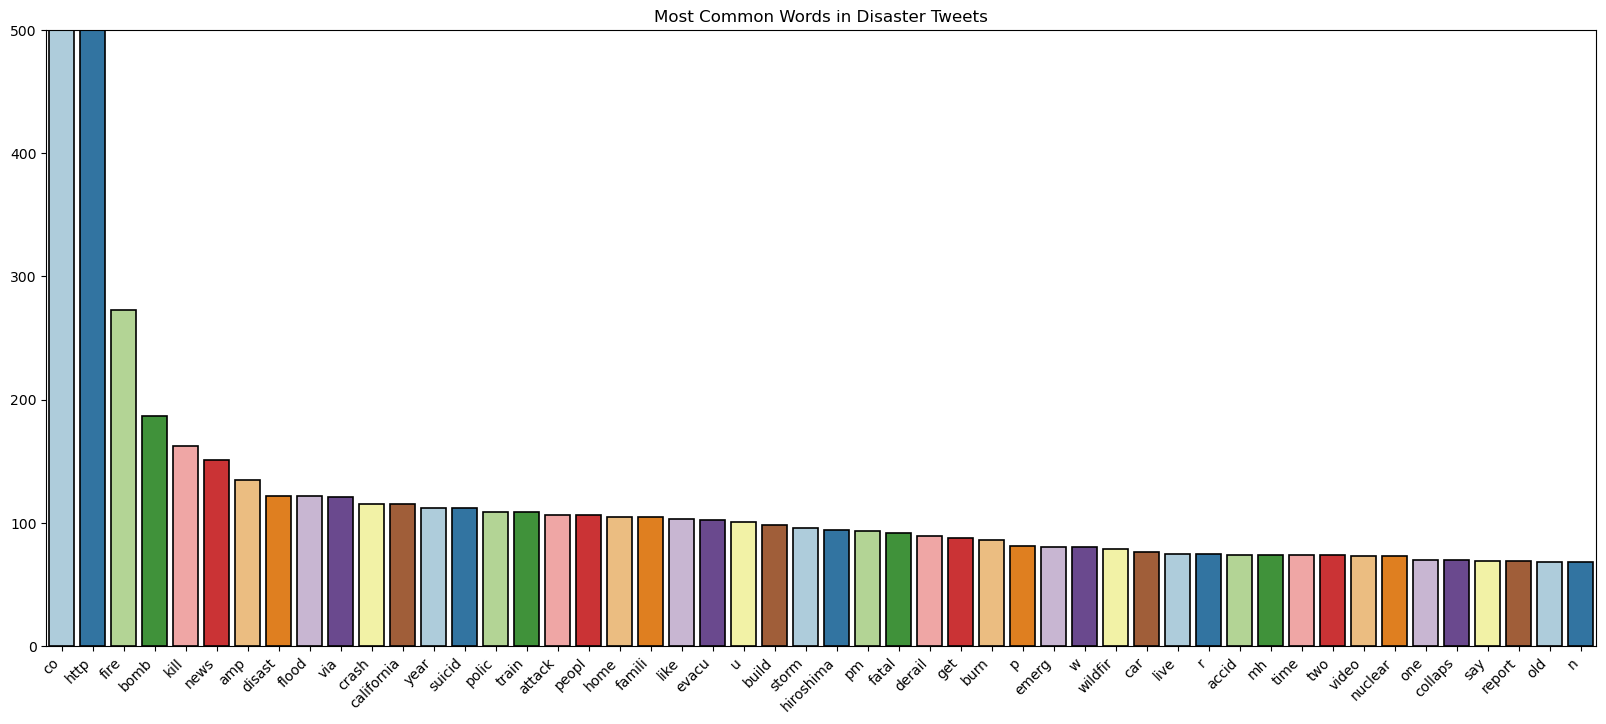

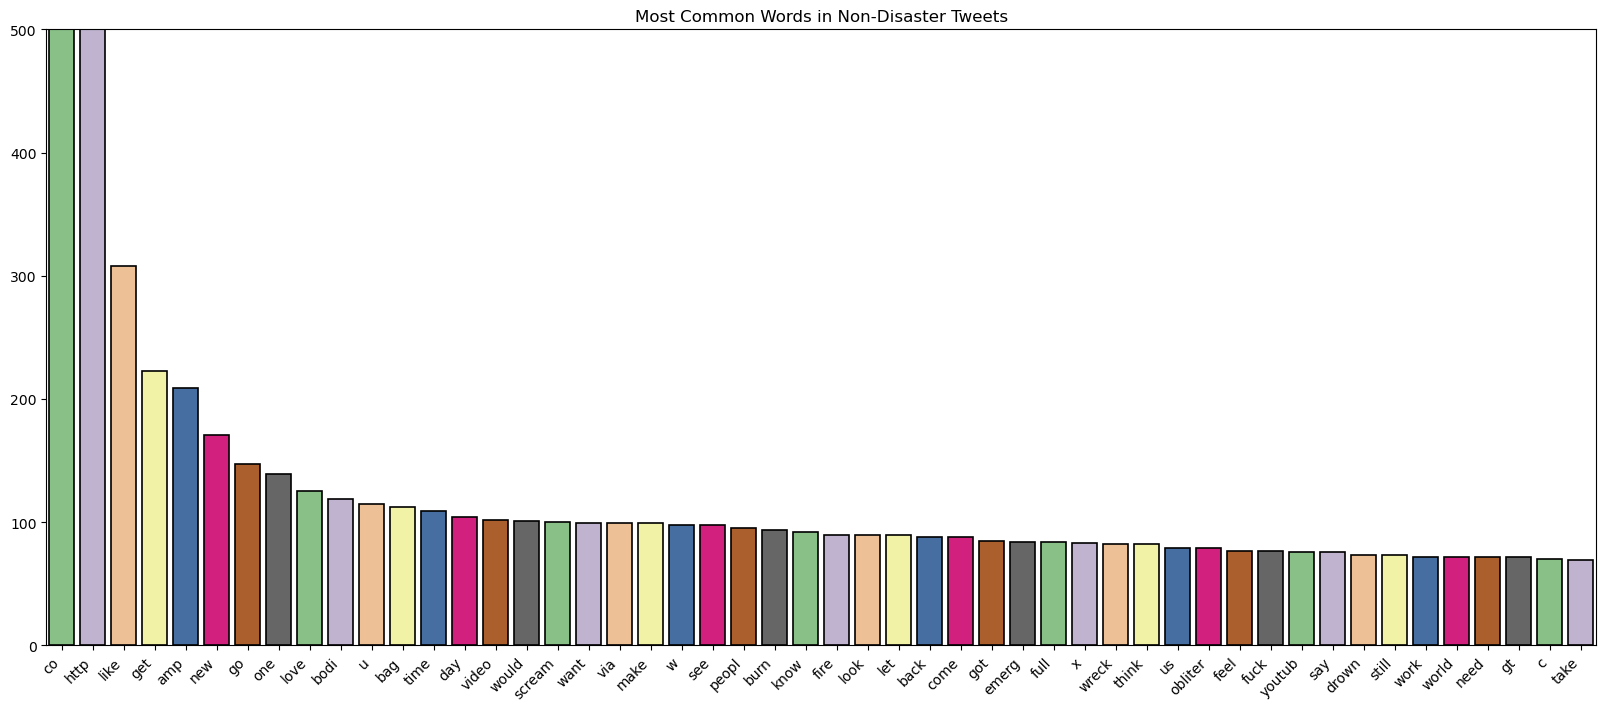

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


clean_train= pd.read_csv('train_cleaned_data.csv')

disaster_tweets = clean_train[clean_train.target == 1]["Cleaned_text"]
non_disaster_tweets = clean_train[clean_train.target == 0]["Cleaned_text"]


def plot_most_common_words(tweets, title, color):
    plt.figure(figsize=(20, 8))
    plt.title(title, fontsize=12)
    
    
    sns.barplot(
        x=pd.Series(' '.join([i for i in tweets]).split()).value_counts().head(50).index,
        y=pd.Series(' '.join([i for i in tweets]).split()).value_counts().head(50),
        palette=color,
        edgecolor='black',
        linewidth=1.2
    )
    
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.ylim(0, 500) 
    plt.show()

plot_most_common_words(disaster_tweets, "Most Common Words in Disaster Tweets", 'Paired')
plot_most_common_words(non_disaster_tweets, "Most Common Words in Non-Disaster Tweets", 'Accent')


Most common word is fire for disaster tweets 
and for non disaster tweets the most common is like


Now that we cleaned the data we can transfrom the words to numerical format using Bag 
of words and count vectorizer 

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd 
def top_ngrams(data, n, grams):
    '''
    Input:
        - data: Input Data
        - n   : Number of top n-words
        - grams: Type of N-grams. 1-> Unigram, 2-> Bigram, 3-> Trigram
        
    Output: Word Frequency of top n words
    '''
    if grams not in [1, 2, 3]:
        raise ValueError("Invalid value for 'grams'. Choose 1 for Unigram, 2 for Bigram, or 3 for Trigram.")

    ngram_range = (grams, grams)
    count_vec = CountVectorizer(ngram_range=ngram_range).fit(data)
    bow = count_vec.transform(data)
    add_words = bow.sum(axis=0)
    word_freq = [(word, add_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

    return word_freq[:n]

# Example usage for unigrams (change grams parameter for bigrams or trigrams)
n = 20  # Top n-words
clean_train= pd.read_csv('train_cleaned_data.csv') 
unigram_freq = top_ngrams(clean_train['Cleaned_text'], n, grams=1)
print(f"Top {n} Unigrams:", unigram_freq)


Top 20 Unigrams: [('co', 4746), ('http', 4721), ('like', 411), ('fire', 363), ('amp', 344), ('get', 311), ('bomb', 239), ('new', 228), ('via', 220), ('news', 213), ('go', 210), ('one', 209), ('peopl', 201), ('time', 183), ('kill', 181), ('burn', 180), ('year', 178), ('video', 175), ('flood', 169), ('crash', 166)]


In [98]:
# Bigrams  

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def top_ngrams(data, n, grams):
    '''
    Input:
        - data: Input Data
        - n   : Number of top n-words
        - grams: Type of N-grams. 1-> Unigram, 2-> Bigram, 3-> Trigram
        
    Output: Word Frequency of top n words
    '''
    if grams not in [1, 2, 3]:
        raise ValueError("Invalid value for 'grams'. Choose 1 for Unigram, 2 for Bigram, or 3 for Trigram.")

    ngram_range = (grams, grams)
    count_vec = CountVectorizer(ngram_range=ngram_range).fit(data)
    bow = count_vec.transform(data)
    add_words = bow.sum(axis=0)
    word_freq = [(word, add_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

    return word_freq[:n]

# Example usage for bigrams
n = 20  # Top n-words
clean_train = pd.read_csv('train_cleaned_data.csv') 
bigram_freq = top_ngrams(clean_train['Cleaned_text'], n, grams=2)
print(f"Top {n} Bigrams:", bigram_freq)


Top 20 Bigrams: [('http co', 4717), ('bodi bag', 80), ('mass murder', 64), ('suicid bomber', 60), ('burn build', 59), ('look like', 55), ('atom bomb', 51), ('train derail', 49), ('video http', 48), ('youtub video', 43), ('like youtub', 42), ('northern california', 41), ('suicid bomb', 40), ('cross bodi', 40), ('oil spill', 39), ('california wildfir', 35), ('fire http', 35), ('year old', 35), ('news http', 34), ('feel like', 32)]


In [99]:
# trigrams 

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def top_ngrams(data, n, grams):
    '''
    Input:
        - data: Input Data
        - n   : Number of top n-words
        - grams: Type of N-grams. 1-> Unigram, 2-> Bigram, 3-> Trigram
        
    Output: Word Frequency of top n words
    '''
    if grams not in [1, 2, 3]:
        raise ValueError("Invalid value for 'grams'. Choose 1 for Unigram, 2 for Bigram, or 3 for Trigram.")

    ngram_range = (grams, grams)
    count_vec = CountVectorizer(ngram_range=ngram_range).fit(data)
    bow = count_vec.transform(data)
    add_words = bow.sum(axis=0)
    word_freq = [(word, add_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

    return word_freq[:n]

# Example usage for trigrams
n = 20  # Top n-words
clean_train = pd.read_csv('train_cleaned_data.csv') 
trigram_freq = top_ngrams(clean_train['Cleaned_text'], n, grams=3)
print(f"Top {n} Trigrams:", trigram_freq)


Top 20 Trigrams: [('video http co', 48), ('like youtub video', 42), ('fire http co', 35), ('news http co', 34), ('suicid bomber deton', 31), ('northern california wildfir', 29), ('bomb http co', 28), ('latest home raze', 28), ('home raze northern', 28), ('pkk suicid bomber', 28), ('bomber deton bomb', 28), ('full http co', 27), ('raze northern california', 27), ('yr old pkk', 27), ('old pkk suicid', 27), ('famili sue legionnair', 26), ('famili affect fatal', 26), ('affect fatal outbreak', 26), ('youtub video http', 25), ('cross bodi bag', 25)]


Now lets plot this on a bar graph


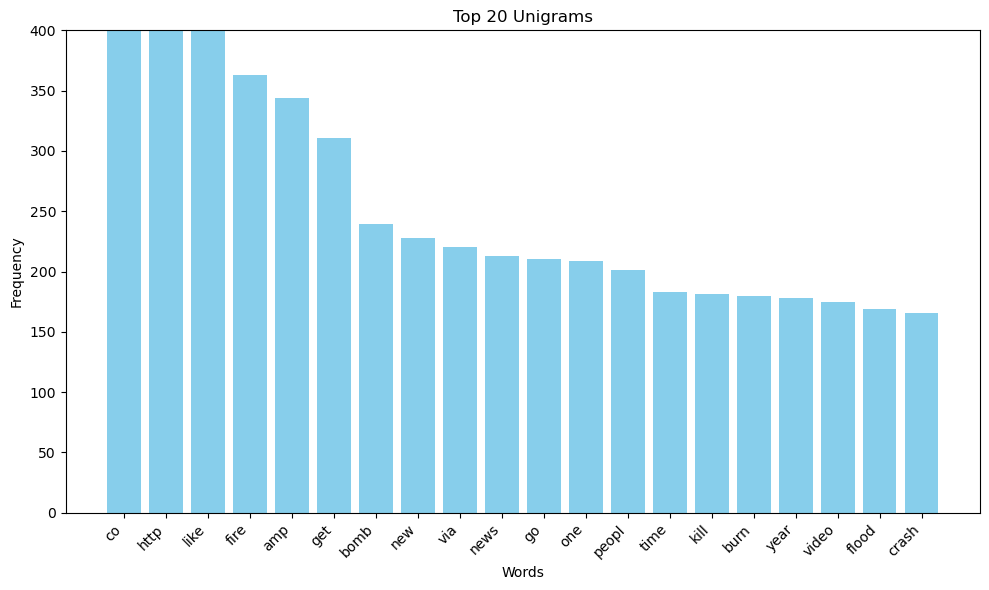

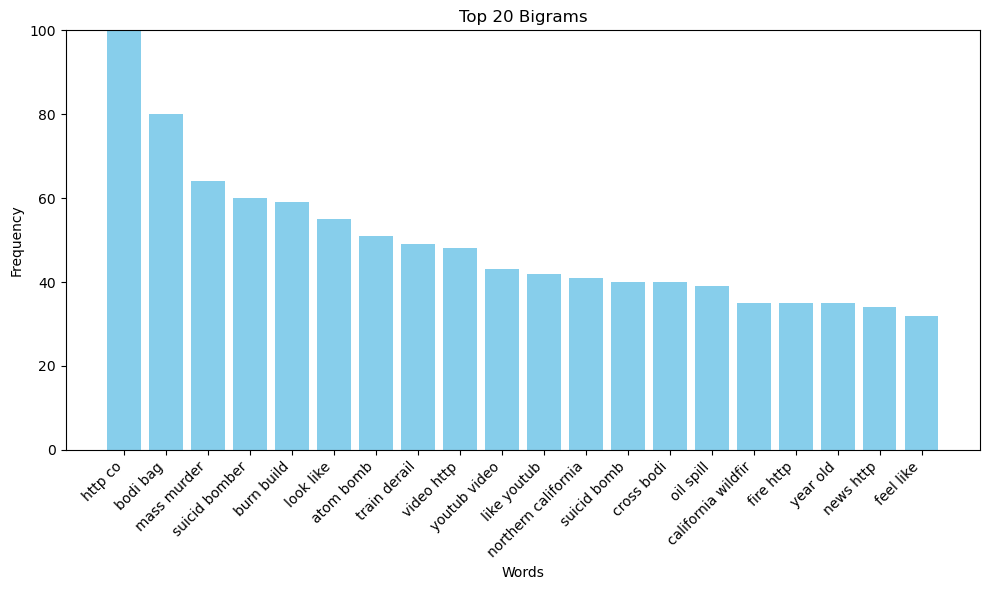

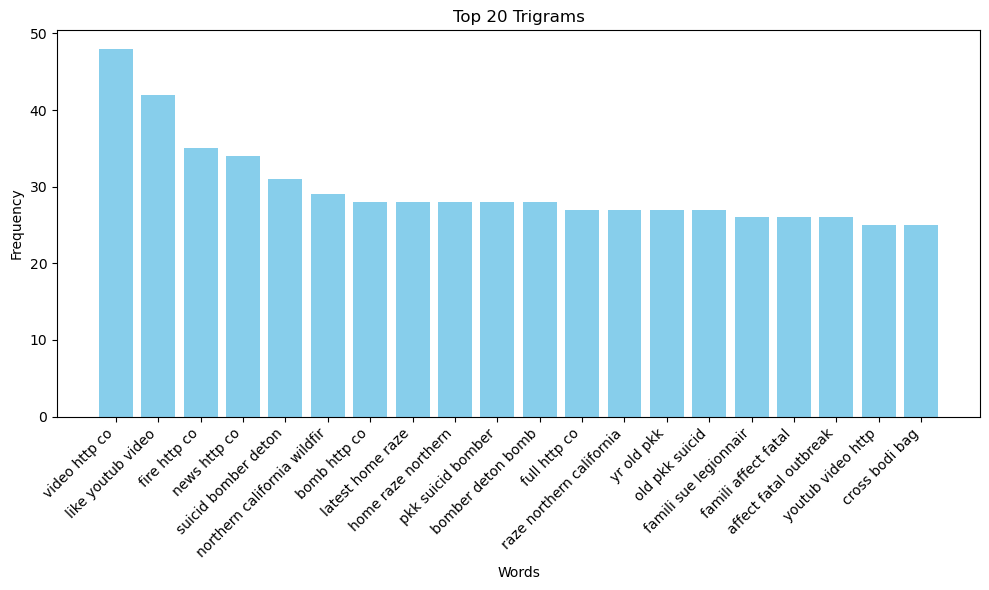

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def plot_ngrams(data, grams, n, y_limit=None):
    '''
    Input:
        - data: Input Data
        - grams: Type of N-grams. 1-> Unigram, 2-> Bigram, 3-> Trigram
        - n   : Number of top n-words
        - y_limit: Y-axis limit for the plot
    Output: Bar graph of top n-grams
    '''
    if grams not in [1, 2, 3]:
        raise ValueError("Invalid value for 'grams'. Choose 1 for Unigram, 2 for Bigram, or 3 for Trigram.")

    ngram_range = (grams, grams)
    count_vec = CountVectorizer(ngram_range=ngram_range).fit(data)
    bow = count_vec.transform(data)
    add_words = bow.sum(axis=0)
    word_freq = [(word, add_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)[:n]

    words, frequencies = zip(*word_freq)

    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='skyblue')
    plt.title(f"Top {n} {('Unigrams', 'Bigrams', 'Trigrams')[grams-1]}")
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')

    if y_limit is not None:
        plt.ylim(0, y_limit)

    plt.tight_layout()
    plt.show()

# Example usage
n = 20  # Top n-words
clean_train = pd.read_csv('train_cleaned_data.csv') 
plot_ngrams(clean_train['Cleaned_text'], grams=1, n=n, y_limit=400)  # Unigrams
plot_ngrams(clean_train['Cleaned_text'], grams=2, n=n, y_limit=100)  # Bigrams
plot_ngrams(clean_train['Cleaned_text'], grams=3, n=n)  # Trigrams


We are going to ignore the http co and like for this analysis.
The most occuring unigram is fire and most common bigram is bodi bag.
The most occuring trigram is like youtube video. Now let us implement tf-idf to enhance BOW 

In [113]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np

def encoding(train_data, test_data, bow, tf_idf):
    '''
    Input: Data to be encoded and choice of encoding.
    Output: Desired Encoding.
    '''
    train_data = train_data.fillna('') 
    test_data = test_data.fillna('')  
    
    # this replaces NaN values with a string
    
    if bow:
        cv = CountVectorizer(ngram_range=(1, 1))
        cv_df_train = cv.fit_transform(train_data).toarray()
        train_df = pd.DataFrame(cv_df_train, columns=cv.get_feature_names_out())

        cv_df_test = cv.transform(test_data).toarray()
        test_df = pd.DataFrame(cv_df_test, columns=cv.get_feature_names_out())

    elif tf_idf:
        tfidf = TfidfVectorizer(
            ngram_range=(1, 1), use_idf=1, smooth_idf=1, sublinear_tf=1)
        tf_df_train = tfidf.fit_transform(train_data).toarray()
        train_df = pd.DataFrame(tf_df_train, columns=tfidf.get_feature_names_out())

        tf_df_test = tfidf.transform(test_data).toarray()
        test_df = pd.DataFrame(tf_df_test, columns=tfidf.get_feature_names_out())

    return train_df, test_df

# Example usage
x_final, x_test_final = encoding(clean_train['Cleaned_text'], clean_test['Cleaned_text'], bow=True, tf_idf=False)
y_final = np.array(y)  # Converting y to array



In [114]:
# Checking dimensions of training and testing data
x_final.shape,y_final.shape,x_test_final.shape

((7613, 18871), (7613,), (3263, 18871))

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your cleaned data  
clean_train = pd.read_csv('train_cleaned_data.csv')
# Converting to list
text = clean_train["Cleaned_text"].tolist()

# Split the data into training and testing sets
train_data, test_data = train_test_split(text, test_size=0.2, random_state=42)

# Display the first three sentences in the training data
print("First three sentences in the training data:")
for i, sentence in enumerate(train_data[:3], 1):
    print(f"Sentence {i}: {sentence}\n")


First three sentences in the training data:
Sentence 1: courag honest analysi need use atom bomb hiroshima japanes militari refus surrend http co vhmtytptgr

Sentence 2: zachzaidman thescor wld b shame golf cart becam engulf flame boycottbear

Sentence 3: tell barackobama rescind medal honor given us soldier massacr wound knee sign amp rt http co u r driuac



In [1]:
# Lets represent our clean data in numerical format 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load the cleaned train data
clean_train = pd.read_csv('train_cleaned_data.csv')

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the cleaned text
X = vectorizer.fit_transform(clean_train["Cleaned_text"])

# Print the bag-of-words representation of the first three sentences
for i in range(3):
    print(f"Sentence {i + 1}: {clean_train['Cleaned_text'][i]}")
    print(f"Vector representation: {X[i].toarray()}\n")



/Users/aminajimale/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Sentence 1: deed reason earthquak may allah forgiv us
Vector representation: [[0 0 0 ... 0 0 0]]

Sentence 2: forest fire near la rong sask canada
Vector representation: [[0 0 0 ... 0 0 0]]

Sentence 3: resid ask shelter place notifi offic evacu shelter place order expect
Vector representation: [[0 0 0 ... 0 0 0]]



In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load the cleaned train data
clean_train = pd.read_csv('train_cleaned_data.csv')

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the cleaned text
X = vectorizer.fit_transform(clean_train["Cleaned_text"])

# Print the size of the word matrix
print("Size of the word matrix:", X.shape)


/Users/aminajimale/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Size of the word matrix: (7613, 18871)


Now that the sentences were converted to numerical format through count vectors
Lets make models to display our results 

In [2]:
# we need to split the data into training, validation and testing sets 
# training data is used to train the machine learning model 
# validation makes sure that the machine learning model can be generalized
# testing makes sure that the machine learning model is applicable. It is the final stage after validation and training 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Load the cleaned train data
clean_train = pd.read_csv('train_cleaned_data.csv')

X = clean_train["Cleaned_text"]
y = clean_train["target"]

#CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the cleaned text
X = vectorizer.fit_transform(X)

# Split the data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, x_valid, Y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify=y_train)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression(C=1.0)
model.fit(X_train, Y_train)
pred = model.predict(x_valid)
cr = classification_report(y_valid, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       391
           1       0.81      0.74      0.77       295

    accuracy                           0.81       686
   macro avg       0.81      0.80      0.81       686
weighted avg       0.81      0.81      0.81       686



Now lets explain the meaning of the logistic report.
It split into three columns:


Precision detects how precise the model is looking at the ratio of true postive prediction over total postive predections.


Recall is the ratio of true positive predections to total actual postive predictions


F1 is mean of precision and recall

Support is the number of occurences in the data set 


0 has a 82% precesion , 87% recall and a 84% f1 score 

1 has a 81% precesion, 74% recall, 77% f1 score 

Overall the model is 81% accurate


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
tree_model = DecisionTreeClassifier(random_state=42) #parameter ensures reproducibility  
tree_model.fit(X_train, Y_train)
tree_pred = tree_model.predict(x_valid)
tree_cr = classification_report(y_valid, tree_pred)
print(tree_cr)



              precision    recall  f1-score   support

           0       0.80      0.79      0.80       391
           1       0.73      0.75      0.74       295

    accuracy                           0.77       686
   macro avg       0.77      0.77      0.77       686
weighted avg       0.77      0.77      0.77       686



the Decision Tree model aims to learn patterns in the 
features of the tweets that are associated
with the target labels (disaster or non-disaster).

Decision tree model captures what some of the linear regression 
model cannot. Like the linear regression model it learns the patteren
that are assocaited with target. However the decision tree model takes into acount non linear relationships. 
It is able to look at both categorical and continuous outcomes. 

In conclusion the linear regression model shows an average 81% f1 accuracy 
while the decesion tree model shows a 77% f1  accuracy. 